# Portfolio Optimization
Modern portfolio theory is also known as mean-variance optimization.

One fundamental assumption is that returns are **normally distributed**.

We will focus on:
* Normality test: Mean Variance Portfolio Theory (MPT) and Capital Asset Pricing Model (CAPM)
* Portfolio optimization
* Bayesian statistics
* Machine learning

***Portfolio theory***

Stock returns are assumed to be normally distributed. Investment decissions are then based on expected mean return as well as variance of returns. 

***CAPM***

Again, when stock returns are normally distributed, prices of single stockscan be elegantly expressed in linear relationship to a broad market index;the relationship is generally expressed by a measure for the co-movement of a single stock with the market called beta or $\beta$.

***Efficient Markets Hypothesis***

An efficient market is a market where prices reflect all available information, where 'all' can be defined more narrowly or more widely (e.g. as in 'all publicly available information vs including also only privately available information'). If this hypothesis holds true, then stock prices fluctuate randomly and returns are normally distributed.

***Option Pricing Theory**

Brownian motion is the benchmark model for the modeling of random pricemovements of financial instruments; the famous Black-Scholes-Mertonoption pricing formula uses a geometric Brownian motion as the model fora stock’s random price fluctuations over time, leading to log-normallydistributed prices and normally distributed returns.


The Geometric Brownian Motion is a stochastic process used in financial modelling.

Log returns are normally distributed:
$\log \frac{S_t}{S_s} = -\log S_t - \log S_s$ where $0 < s < t$

## Simulated data

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
import pandas as pd
import os
import warnings
np.random.seed(100)

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

import sys, os
scr_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(scr_dir)
from load import YFinanceDataset


In [2]:
# Lets create a function to generate 
## a Monte Carlo simulated geometric Brownian Motion
def gen_paths(s0, r, sigma, T, M, I):
    """
    Parameters
    ----------
    s0: (float) initial stock/index value
    r: (float) constant short rate
    sigma: (float) constant volatility
    T: (float) final time horizon
    M: (int) number of time steps/intervals
    I: (int) number of paths to be simulated
    
    Returns
    -------
    paths: ndarray, shape (M + 1, I) simulated paths
    """
    dt = T/M
    paths = np.zeros((M + 1, I))
    paths[0] = s0
    for t in range(1, M + 1):
        result = np.random.standard_normal(I)
        result = (result - result.mean())/result.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * result)
    return paths
    

105.12710963760242
105.12645392478755


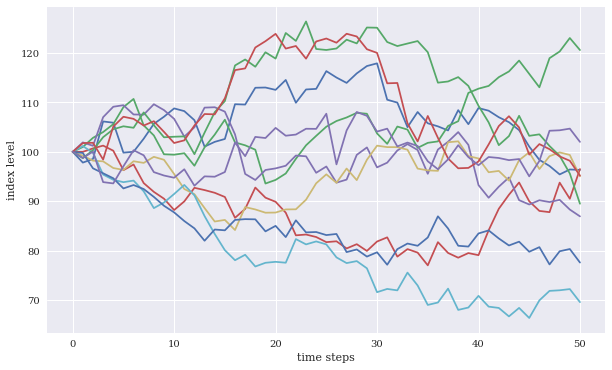

In [3]:
s0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)
paths = gen_paths(s0, r, sigma, T, M, I)
init_s = s0 * math.exp(r * T)
last_s = paths[-1].mean()
print(init_s)
print(last_s)

plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

In [4]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [5]:
log_returns = np.log(paths[1:]/paths[:-1])
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [6]:
def print_statistics(array):
    sta = scs.describe(array)
    print('{:14s} {:15s}'.format('statistic', 'value'))
    print(30 * '-')
    print('{:14s} {:15.5f}'.format('size', sta[0]))
    print('{:14s} {:15.5f}'.format('min', np.min(sta[1][0])))
    print('{:14s} {:15.5f}'.format('max', np.max(sta[1][1])))
    print('{:14s} {:15.5f}'.format('mean', np.mean(sta[2])))
    print('{:14s} {:15.5f}'.format('std', np.sqrt(sta[3])))
    print('{:14s} {:15.5f}'.format('skew', sta[4]))
    print('{:14s} {:15.5f}'.format('kurtosis', sta[5]))
    

In [7]:
#print_statistics(log_returns)

# Visual test of normality

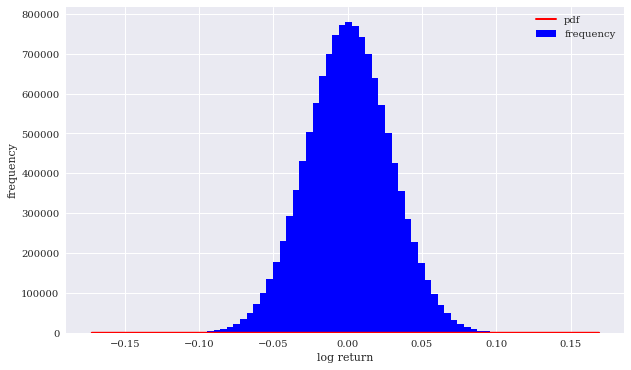

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, 
#          normed=True,
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, 
                         scale=sigma/np.sqrt(M)), 'r', 
         lw=2.0, label='pdf')
plt.legend();

# Test by quantile quantile graph

<Figure size 720x432 with 0 Axes>

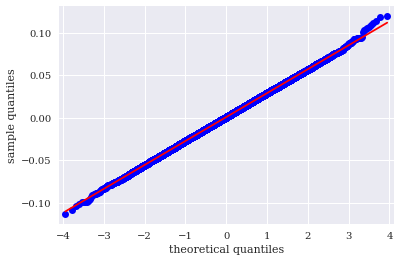

In [9]:
plt.figure(figsize=(10, 6))
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

## Other tests
* skewness: value near 0
* kurtosis test: value near 0

In [10]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.         
    Parameters            
    ==========             
    array: ndarray                 
    object to generate statistics on             
    '''
    print('Skew of data set  %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurtosis of data set  %14.3f' % scs.kurtosis(arr))
    print('Kurtosis test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [11]:
# if p-value > 0.5 then normal distributed

normality_tests(log_returns.flatten()) 

Skew of data set           0.001
Skew test p-value          0.430
Kurtosis of data set           0.001
Kurtosis test p-value          0.541
Norm test p-value          0.607


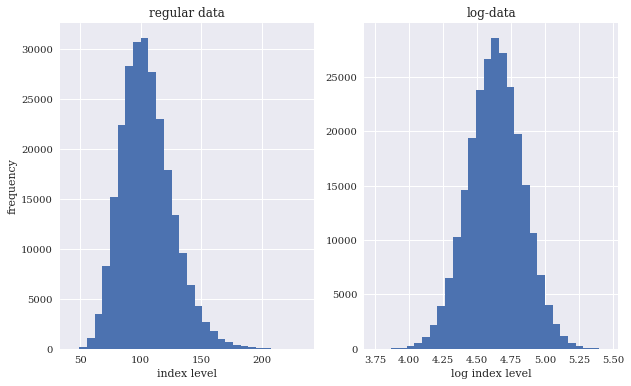

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1],bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]),bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log-data');


In [13]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurtosis of data set          -0.003
Kurtosis test p-value          0.744
Norm test p-value          0.931


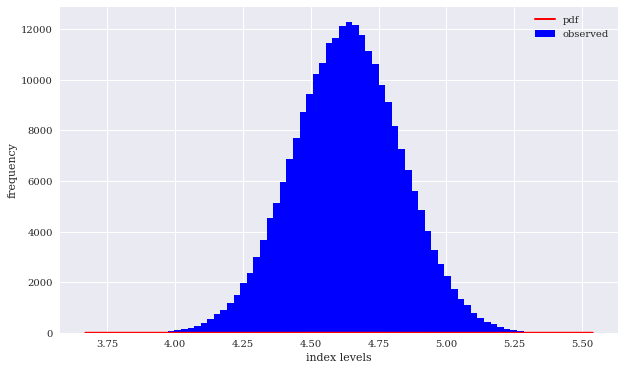

In [14]:
plt.figure(figsize=(10,6))
log_data=np.log(paths[-1])
plt.hist(log_data, bins=70, label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(
    x,log_data.mean(),log_data.std()),'r',lw=2.0, label='pdf')
plt.legend();

In [15]:
def qqplot(log_data):
    sm.qqplot(log_data, line='s')
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles');

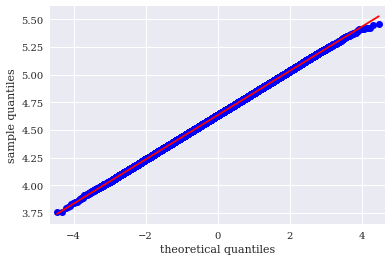

In [16]:
qqplot(log_data)

## Real Data

In [17]:

data = YFinanceDataset().get_multiple_tickers(
     ticker_names=[
         'MSFT', 
         'IBM',
         'KO', 
         'AAPL', 
         'AMZN', 
         'GOOG', 
         'NVDA'
     ])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2020-08-17 to 2021-12-10
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSFT_Close  334 non-null    float64
 1   IBM_Close   334 non-null    float64
 2   KO_Close    334 non-null    float64
 3   AAPL_Close  334 non-null    float64
 4   AMZN_Close  334 non-null    float64
 5   GOOG_Close  334 non-null    float64
 6   NVDA_Close  334 non-null    float64
dtypes: float64(7)
memory usage: 20.9 KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSFT_Close,334.0,253.812296,40.533961,197.796341,216.816910,244.765839,287.572586,342.402008
IBM_Close,334.0,119.754310,10.595425,94.549217,110.796715,117.778984,130.145096,139.418823
KO_Close,334.0,51.768332,3.100653,45.113224,48.737425,52.417284,54.204653,56.610435
AAPL_Close,334.0,132.616901,14.316902,105.867622,121.366852,130.334343,145.158470,179.221664
AMZN_Close,334.0,3300.805235,164.386531,2951.949951,3182.482422,3291.860107,3415.812500,3731.409912
GOOG_Close,334.0,2243.466047,496.087588,1415.209961,1763.092499,2267.594971,2737.684998,3014.179932
NVDA_Close,334.0,172.794348,53.608564,115.831329,132.961987,145.748917,203.421719,333.719147


In [20]:
data.head()

,MSFT_Close,IBM_Close,KO_Close,AAPL_Close,AMZN_Close,GOOG_Close,NVDA_Close
Date,,,,,,,
2020-08-17,207.057785,110.320732,46.000603,113.564438,3182.409912,1517.979980,123.189079
2020-08-18,208.249268,110.746254,46.200977,114.510742,3312.489990,1558.599976,122.427696
2020-08-19,206.985809,109.788795,45.199104,114.654419,3260.479980,1547.530029,121.206993
2020-08-20,211.802673,109.177078,45.180016,117.198555,3297.370117,1581.750000,121.231956
2020-08-21,210.262863,109.185959,45.113224,123.238091,3284.719971,1580.420044,126.648994


In [21]:
data.iloc[0:2]

,MSFT_Close,IBM_Close,KO_Close,AAPL_Close,AMZN_Close,GOOG_Close,NVDA_Close
Date,,,,,,,
2020-08-17,207.057785,110.320732,46.000603,113.564438,3182.409912,1517.979980,123.189079
2020-08-18,208.249268,110.746254,46.200977,114.510742,3312.489990,1558.599976,122.427696


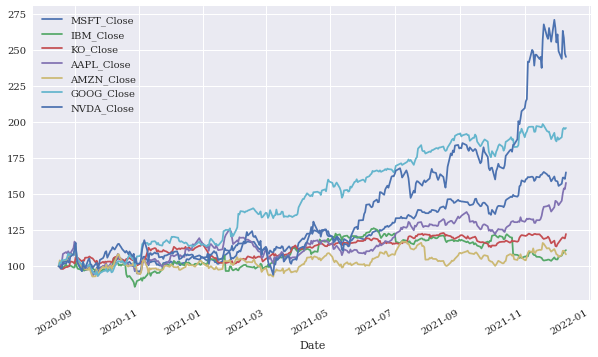

In [22]:
(data/data.iloc[0] * 100).plot(figsize=(10, 6));

In [23]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

,MSFT_Close,IBM_Close,KO_Close,AAPL_Close,AMZN_Close,GOOG_Close,NVDA_Close
Date,,,,,,,
2020-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18,0.005738,0.003850,0.004346,0.008298,0.040061,0.026407,-0.006200
2020-08-19,-0.006086,-0.008683,-0.021924,0.001254,-0.015826,-0.007128,-0.010021
2020-08-20,0.023005,-0.005587,-0.000422,0.021947,0.011251,0.021872,0.000206
2020-08-21,-0.007297,0.000081,-0.001479,0.050249,-0.003844,-0.000841,0.043714


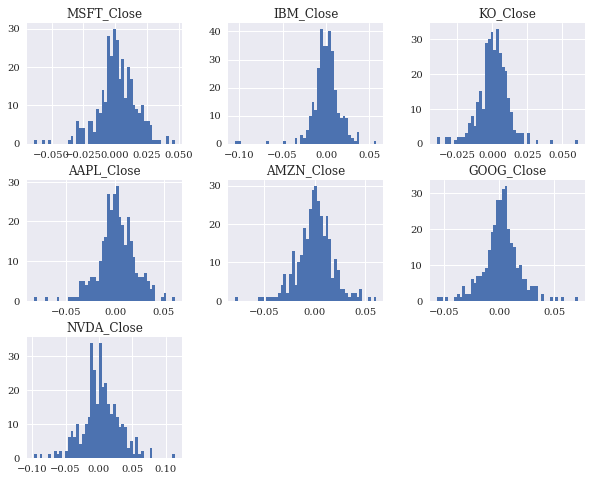

In [24]:
log_returns.hist(bins=50, figsize=(10, 8));

In [25]:
for sym in data.columns:
    print('\nResults for symbol {}'.format(sym))
    print(30*'-')
    log_data=np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol MSFT_Close
------------------------------
Skew of data set          -0.469
Skew test p-value          0.001
Kurtosis of data set           1.774
Kurtosis test p-value          0.000
Norm test p-value          0.000

Results for symbol IBM_Close
------------------------------
Skew of data set          -1.689
Skew test p-value          0.000
Kurtosis of data set          11.633
Kurtosis test p-value          0.000
Norm test p-value          0.000

Results for symbol KO_Close
------------------------------
Skew of data set           0.089
Skew test p-value          0.497
Kurtosis of data set           3.897
Kurtosis test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL_Close
------------------------------
Skew of data set          -0.368
Skew test p-value          0.007
Kurtosis of data set           1.765
Kurtosis test p-value          0.000
Norm test p-value          0.000

Results for symbol AMZN_Close
------------------------------
S

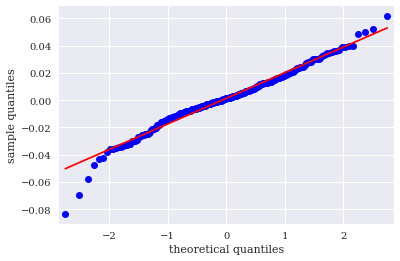

In [26]:
qqplot(log_returns['AAPL_Close'].dropna())

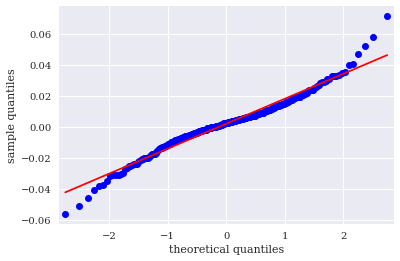

In [27]:
qqplot(log_returns['GOOG_Close'].dropna())

# Portfolio Optimization
The portfolio weights sum to one:

$\sum_{i = 1}^{n}w_i = 1$ 

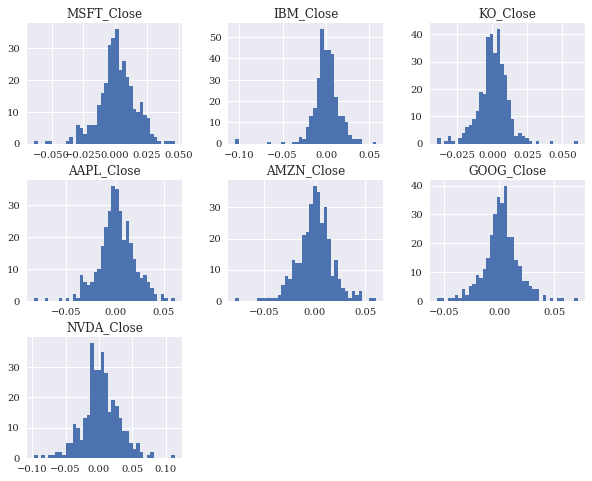

In [28]:
noa = data.shape[1]  # (1000, 10)
rets = np.log(data/data.shift(1))
rets.hist(bins=40, figsize=(10, 8));


In [29]:
rets.mean() * 252 # annualized returns

MSFT_Close    0.379381
IBM_Close     0.079945
KO_Close      0.152626
AAPL_Close    0.345273
AMZN_Close    0.059833
GOOG_Close    0.508812
NVDA_Close    0.678539
dtype: float64

In [30]:
rets.cov() * 252 # annualized covariance matrix

,MSFT_Close,IBM_Close,KO_Close,AAPL_Close,AMZN_Close,GOOG_Close,NVDA_Close
MSFT_Close,0.055853,0.005700,0.013693,0.048536,0.045308,0.044529,0.065654
IBM_Close,0.005700,0.061388,0.017672,0.005527,0.000716,0.010721,0.000032
KO_Close,0.013693,0.017672,0.030707,0.012167,0.007398,0.016575,0.006449
AAPL_Close,0.048536,0.005527,0.012167,0.089270,0.055149,0.041431,0.074197
AMZN_Close,0.045308,0.000716,0.007398,0.055149,0.077709,0.044175,0.072214
GOOG_Close,0.044529,0.010721,0.016575,0.041431,0.044175,0.065632,0.055894
NVDA_Close,0.065654,0.000032,0.006449,0.074197,0.072214,0.055894,0.190751


## weights

In [31]:
weights = np.random.random(noa)
weights /= np.sum(weights)
print('weights:', weights)
print()
print('weights sum:', weights.sum())

weights: [0.02340192 0.01841974 0.19381737 0.07023924 0.36970651 0.13759682
 0.18681841]

weights sum: 0.9999999999999998


Formula for expected return of a portfolio:

$\mu_p = E\big(\sum_I w_i r_i \big) = \sum_I w_i \mu_i$

use linearity of expectation operator.

Expected portfolio variance is given by:

the covariance is

$\sigma_{ij} = E(r_i - \mu_i)(r_j - \mu_j)$

from this we get the variance

$\sigma ^2 = E((r_i - \mu_i)^2) = \sum_{i\in{I}}\sum_{j\in{I}}w_iw_j\sigma_{ij} = w^T\Sigma w$

In [32]:
np.sum(rets.mean() * weights) * 252

0.2830791000808216

## variance

In [33]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # variance

0.04800339623544723

In [34]:
math.sqrt(np.dot(weights.T,np.dot(rets.cov() * 252,weights))) # volatility

0.21909677367649033

In [35]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [36]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [37]:
prets=[]
pvols=[]
for p in range(2500):
    weights = np.random.random(noa)
    weights/=np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))


In [38]:
prets = np.array(prets)
pvols = np.array(pvols)

Sharpe Ratio:

$SR = \frac{\mu_p - r_f}{\sigma_p}$



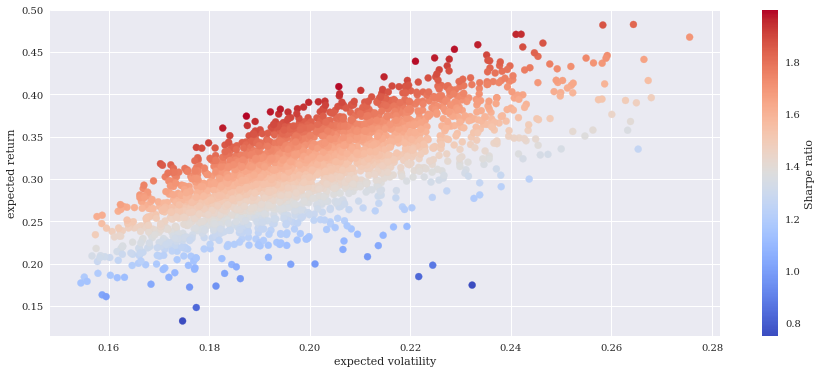

In [39]:
plt.figure(figsize=(15,6))
plt.scatter(pvols,prets,c=prets/pvols,marker='o',cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## Optimal portfolios
The optimal portfolio is found by minimizing with respect to the negative of the Sharpe Ratio. The weights are constrained to be between 0 and 1 and add up to 1.

### Minimize 
The minimize is part of the optimize module in scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [40]:
import scipy.optimize as sco

In [41]:
def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)

In [42]:
cons = ({'type':'eq','fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1./noa])
eweights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [43]:
min_func_sharpe(eweights)

-1.6168790186434596

In [44]:
%%time
opts=sco.minimize(min_func_sharpe,
                  eweights,method='SLSQP',
                  bounds=bnds,
                  constraints=cons)

Wall time: 80 ms


In [45]:
opts

     fun: -2.101859453880684
     jac: array([ 8.18866193e-02,  3.55686247e-02, -8.05556774e-05,  2.07392901e-01,
        1.46591750e+00, -5.06639481e-07,  6.58929348e-05])
 message: 'Optimization terminated successfully'
    nfev: 64
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00000000e+00, 4.13566894e-16, 1.57009442e-01, 0.00000000e+00,
       0.00000000e+00, 6.45997923e-01, 1.96992636e-01])

In [46]:
opts['x'].round(3)

array([0.   , 0.   , 0.157, 0.   , 0.   , 0.646, 0.197])

In [47]:
port_ret(opts['x']).round(3)


0.486

In [48]:
port_vol(opts['x']).round(3)

0.231

In [49]:
port_ret(opts['x'])/port_vol(opts['x']) # sharpe ratio

2.101859453880684

## minimization of volatility

In [50]:
optv = sco.minimize(port_vol,eweights,
                    method='SLSQP',
                    bounds=bnds,
                    constraints=cons)
optv

     fun: 0.14907797107303697
     jac: array([0.14928366, 0.14884923, 0.1491771 , 0.14911465, 0.14890232,
       0.15596273, 0.15431163])
 message: 'Optimization terminated successfully'
    nfev: 80
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.15631195e-01, 1.99847278e-01, 5.17381318e-01, 1.35525272e-18,
       1.67140208e-01, 2.87313576e-18, 0.00000000e+00])

In [51]:
np.mean(np.array([0.18576914, 0.18558958, 0.18524021, 0.18638385, 0.18620184])).round(3)

0.186

In [52]:
optv['x'].round(3)

array([0.116, 0.2  , 0.517, 0.   , 0.167, 0.   , 0.   ])

In [53]:
port_vol(optv['x']).round(3)

0.149

In [54]:
port_ret(optv['x']).round(4)

0.1488

In [55]:
(port_ret(optv['x'])/port_vol(optv['x'])).round(3)

0.998

In [56]:
port_ret(optv['x'])/port_vol(optv['x'])

0.9982125425412294

## Efficient frontier
Fix a target return level and derive for each such level those portfolio weights that lead to the minimum volatility value. Because when iterating over different target return levels one condition for the minimization changes. That is why we update the dictionary of constraints.

In [57]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [58]:
bnds = tuple((0, 1) for x in weights)

In [59]:
%%time 
trets = np.linspace(0.175, 0.3, 50)
tvols = []
for tret in trets:
    res = sco.minimize(
        port_vol,
        eweights,
        method='SLSQP',
        bounds=bnds,
        constraints=cons
    )
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 4.18 s


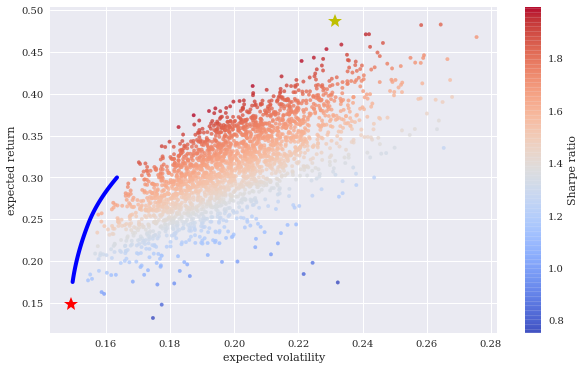

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(pvols,
            prets, c=prets/pvols, marker='.',
            alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
